# Análisis de correspondencias Proyecto Caracterización demográfica.

## Referentes

https://www.r-bloggers.com/pca-and-k-means-clustering-of-delta-aircraft/

http://eric.univ-lyon2.fr/~ricco/cours/slides/en/classif_variables_quali.pdf



In [1]:
# Libraries
library (ggplot2)
#install.packages("scatterplot3d", repos='https://cloud.r-project.org')
library(scatterplot3d)
getmode= function(v){
    uniquev=unique(v)
    uniquev[which.max(tabulate(match(v,uniquev)))]
}

Warning message:
: package 'scatterplot3d' was built under R version 3.3.2

# PENDIENTES

- Asignar valores de facotres a variables
- Eliminar valores nulos (reemplazar por promedio o por moda)
- Clusters por K-Medias
- Clusters por PCA


## Carga test files

In [2]:
test1=read.csv(file="2016-10-29_DatosEncuesta.csv",header = T, fileEncoding = "UTF-8")
rownames(test1)=test1[,1]
test1=test1[,-1]
print(ncol(test1))

[1] 109


## Variables Priorizadas

In [3]:
test_full=test1
var_import=c(3,4,8,32,34,35,38,39,41,42,43,53,61,62,68,70,71,72,73,75,105,106,107)
test2=test1[,var_import]
colnames(test2)
test1=test2

[1] "edad"           "sexo"           "poblacin_esp"   "lug_trabajo"   
 [5] "ing_mensual"    "grupo_fliar"    "profesin_padre" "educacin_padre"
 [9] "profesin_madre" "educacin_madre" "educa_pareja"   "prof_mayores1" 
[13] "profesin_hnos2" "profesin_hnos3" "otra_carrera"   "mot_calidad"   
[17] "mot_costo"      "mot_beneficio"  "mot_gusto"      "mot_personal"  
[21] "costos"         "calidad"        "modalidad"

### Transformar variables en factores

In [4]:
# test2$sexo=factor(test2$sexo,levels=c(1,2),labels = c("Femenino","Masculino"))
# test2$poblacin_esp = factor (test2$poblacin_esp,levels=c(0,1,2,3,4,5,6,7),labels=c(
#     "No pertenece","Madre cabeza de familia","Padre cabeza de familia","Indígena","Reinsertado","Desplazado","Adulto Mayor","LGBTI"
# ))

# test2$lug_trabajo = factor (test2$lug_trabajo,levels=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),labels=c(
#     "No aplica","Servicios Generales","ETB","Microempresa","Colegio","Universidad","ISIVEN ANDINA","Independiente","Banco","Fiscalía","Constructora","Consultora Recursos Humanos","Hacienda","Acueducto","DERALAM SAS"
# ))

# test2$ing_mensual = factor (test2$ing_mensual,levels=c(0,1,2,3,4,5,6,7),labels=c(
#     "No aplica","Menos de un salario mínimo","De 1 a 2 SMMLV","De 2 a 3 SMMLV","De 4 a 5 SMMLV","De 5 a 6 SMMLV","De 6 a 7 SMMLV","Más de 7 SMMLV"
# ))


# # ########
# # test2$ = factor (test2$,
# #                  levels = c(),
# #                  labels=c("")
# #                 )


In [5]:
#pairs(test2[1:20],cex=0.5,pch=16)

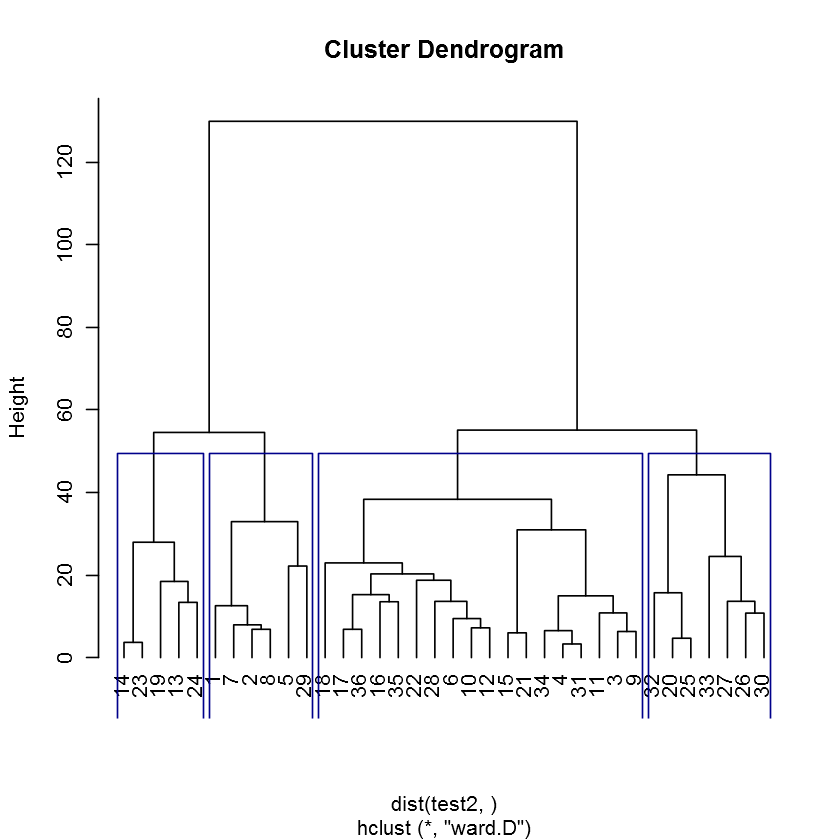

In [6]:
dend_test1=hclust(dist(test2,),method="ward.D")
plot(dend_test1,hang=-1)
groups <- cutree(dend_test1, k=4) 
rect.hclust(dend_test1, k=4, border="darkblue") 

In [7]:
varnames=c("Años cumplidos",
"Sexo biológico",
"Pertenencia a una población especial",
"Lugar de trabajo",
"Valor de ingreso mensual",
"Grupo familiar actual",
"Profesión padre",
"Nivel Educativo Padre",
"Profesión madre",
"Nivel Educativo madre",
"Importancia de educación profesional en pareja actual o futura",
"Profesión Hijos mayores de Edad",
"Profesión Hermanos",
"Profesión Hermanos",
"Carreras estudiadas diferentes antes de ingresar a UVD",
"Eligió su carrera por calidad",
"Eligió su carrera por costo",
"Eligió su carrera por beneficios",
"Eligió su carrera porque siempre le ha gustado",
"Eligió su carrera por interés personal",
"Estudia en UVD por costos",
"Estudia en UVD por calidad",
"Estudia en UVD por modalidad"
)

## Perfiles para todas las variables

In [8]:
# for (i in 1:ncol(test1)){
#     data=test1[,i]
#     data_table=prop.table(table(test1[,i],groups),2)
#     #bp=barplot(data_table,main=varnames[i],xlab="Clusters",ylab="Proporción")
#     bp=barplot(data_table,main=colnames(test1)[i],xlab="Clusters",ylab="Proporción")
#     for (clust in 1:4){
#         yval=0
#         for (dat in 1:nrow(data_table)){
#             if (data_table[dat,clust]>0){
#                 yval=yval+data_table[dat,clust]
#                 #print(c(clust,yval))
#                 text(clust,yval-0.015,rownames(data_table)[dat], cex=0.8)
#             }
#         }
#     }
# }
# #summary(test1)

## Perfiles para las variables prioridad

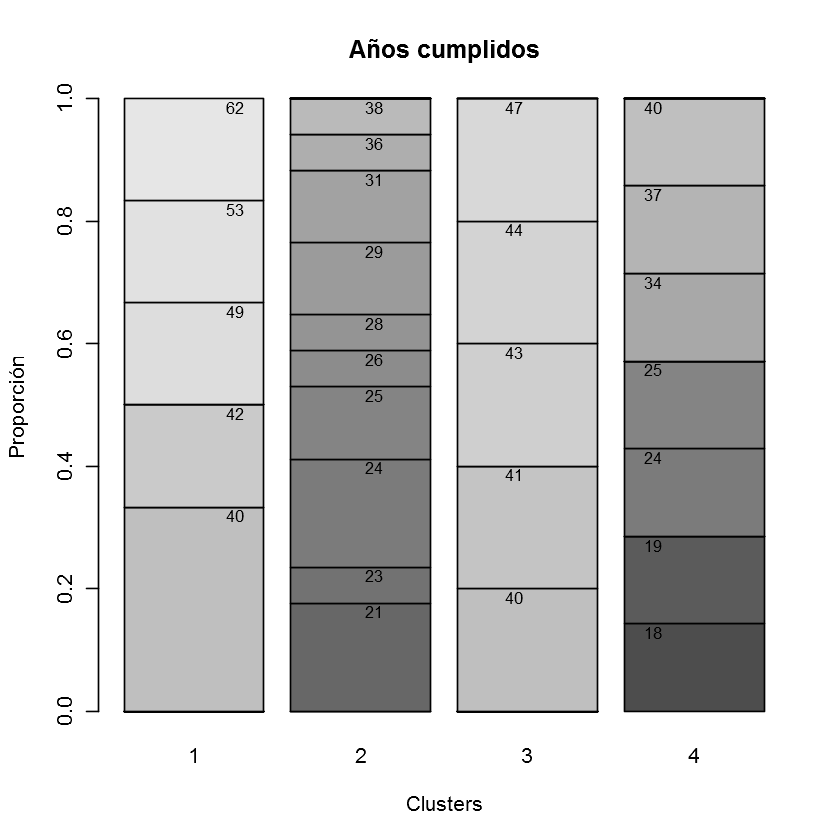

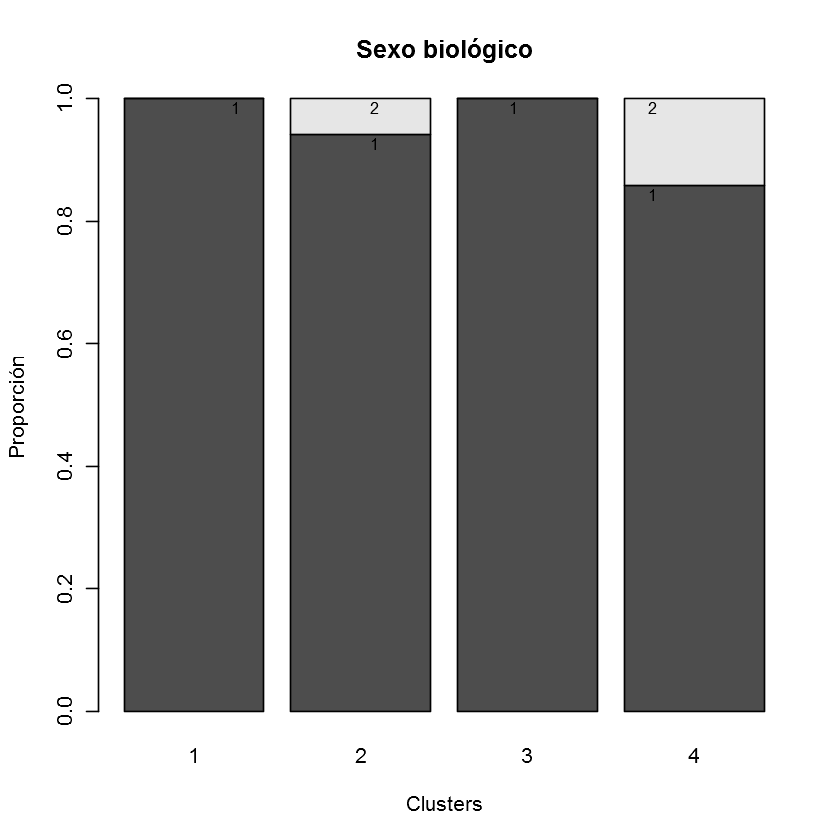

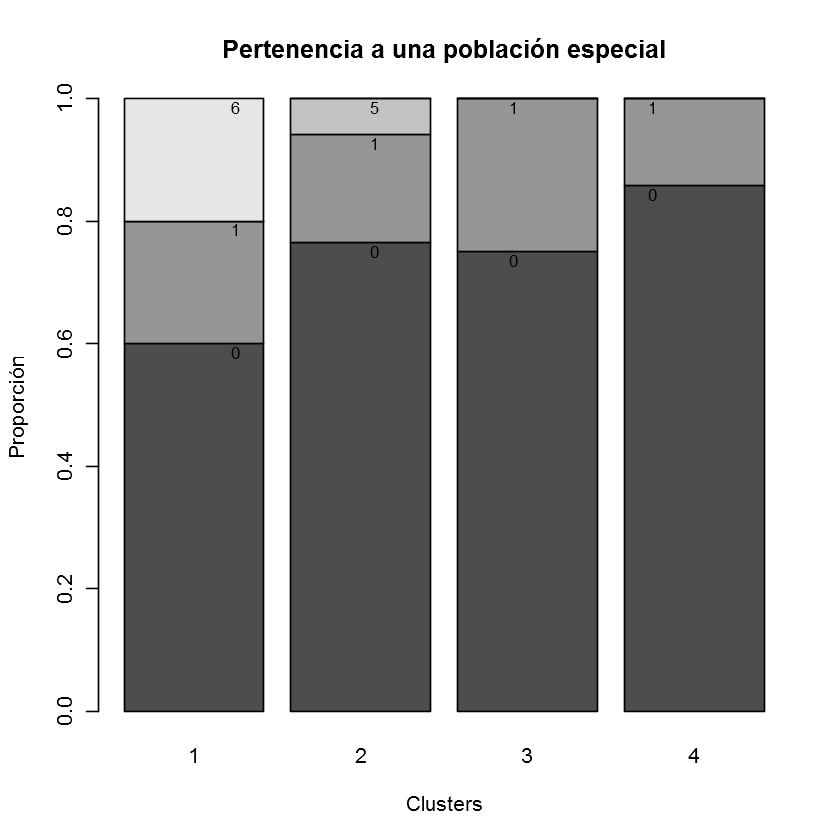

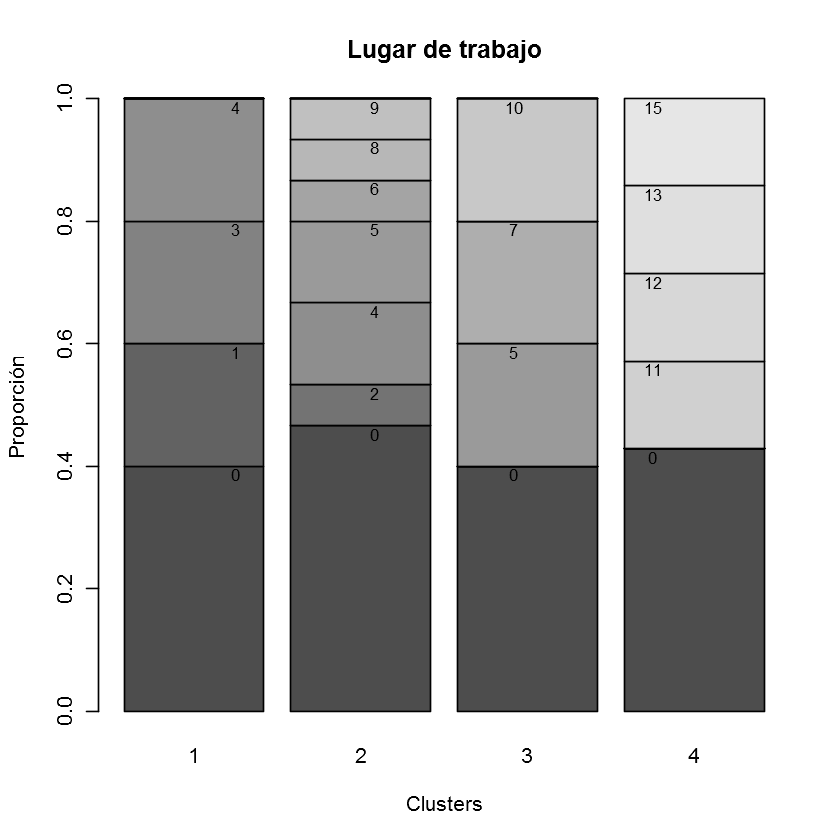

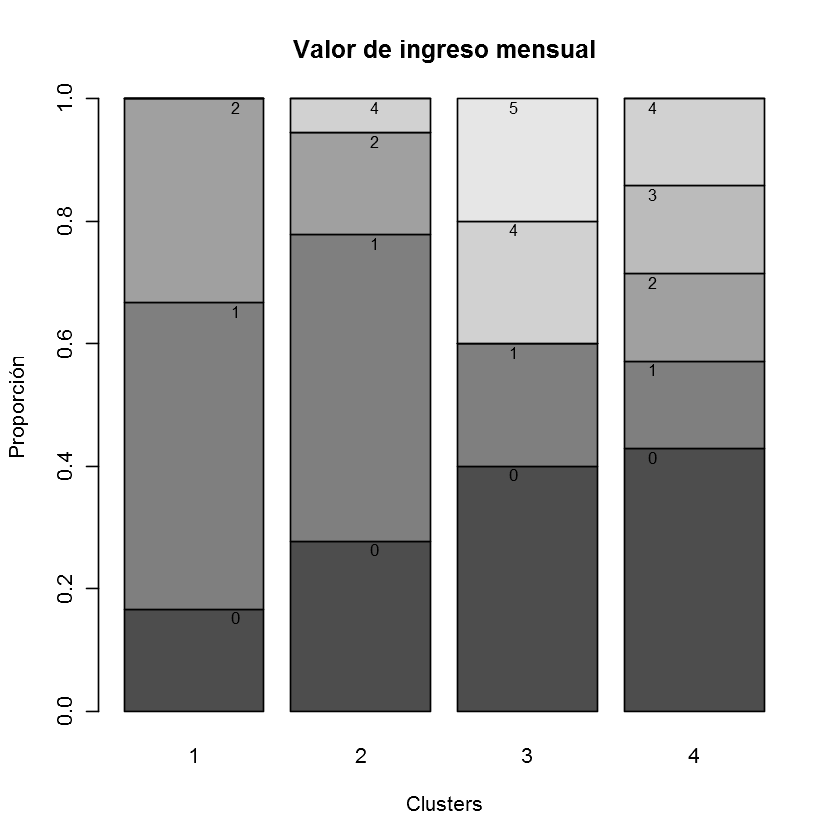

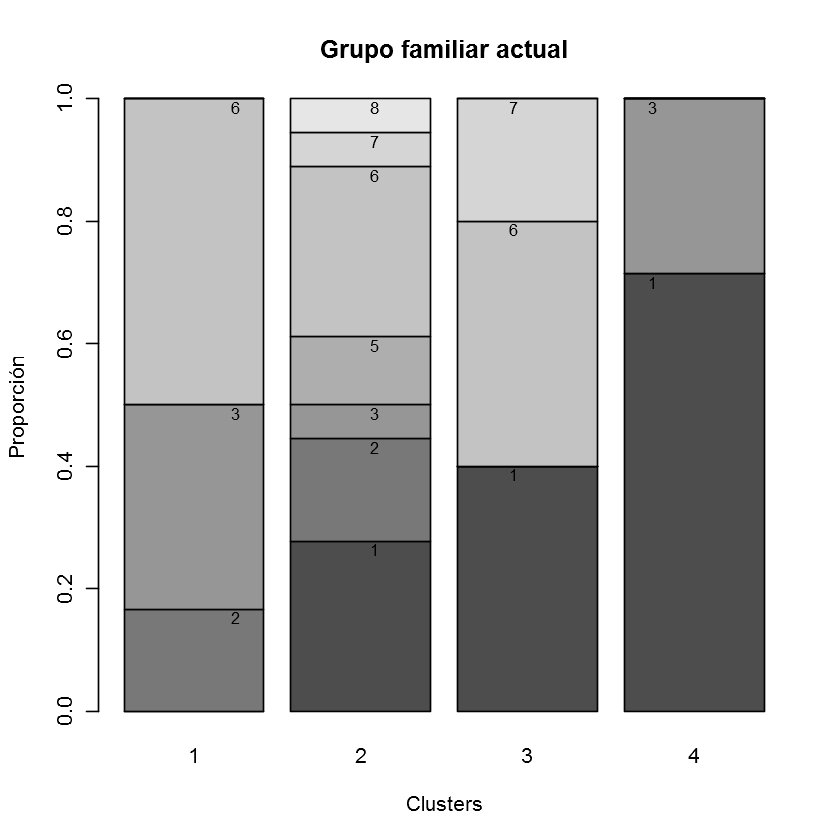

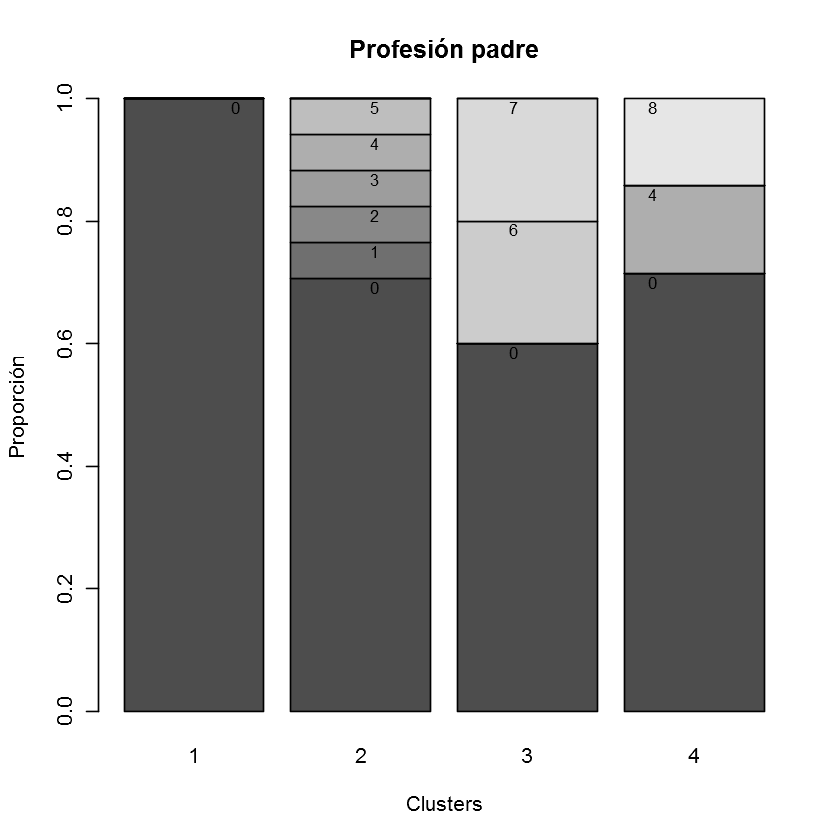

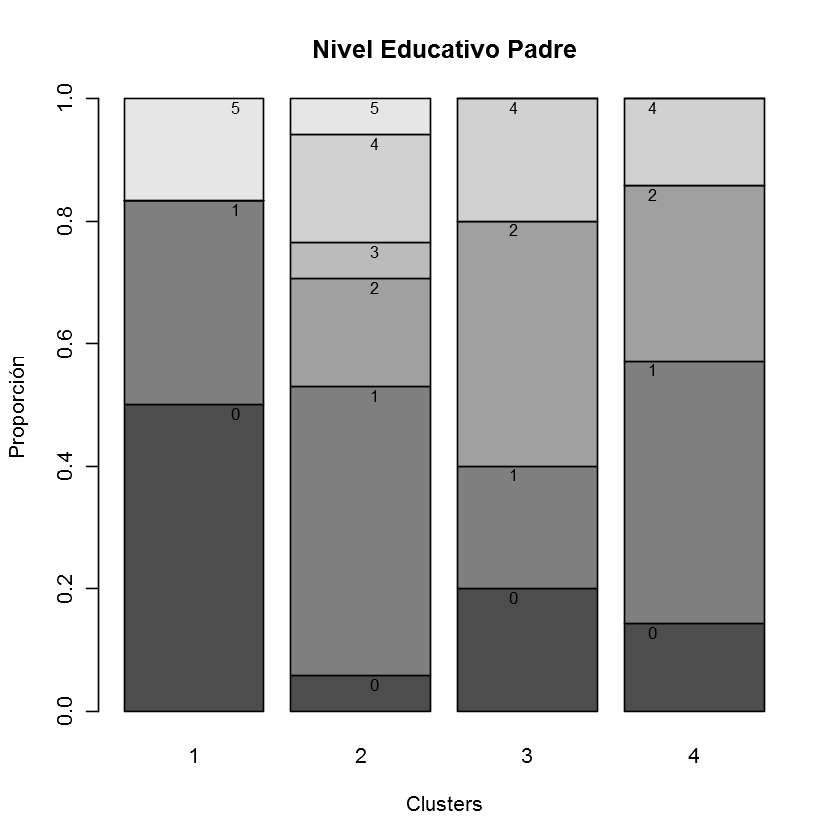

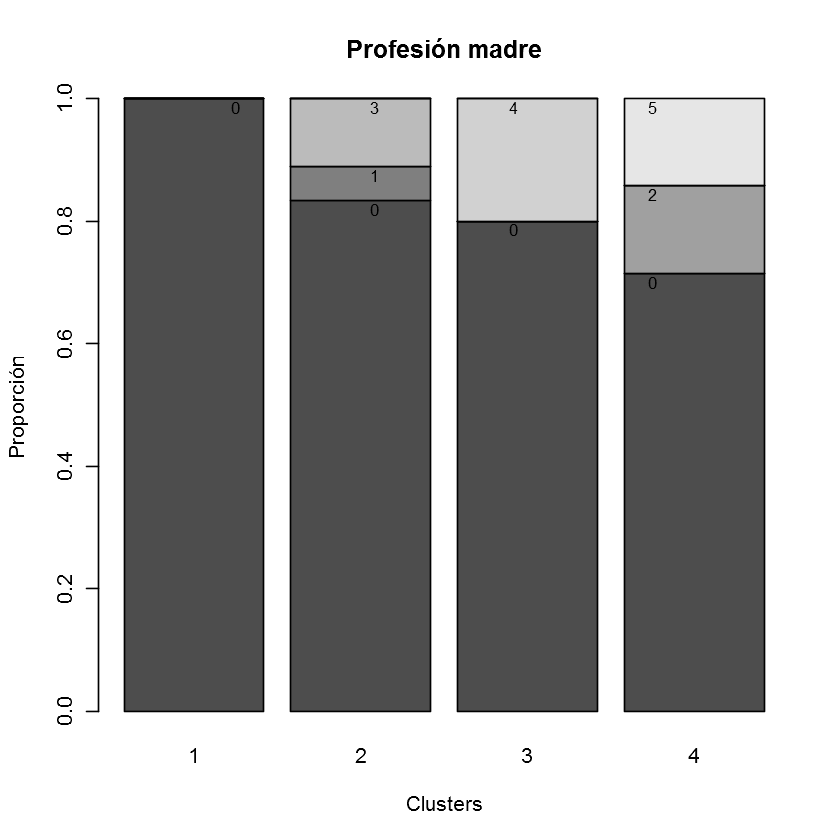

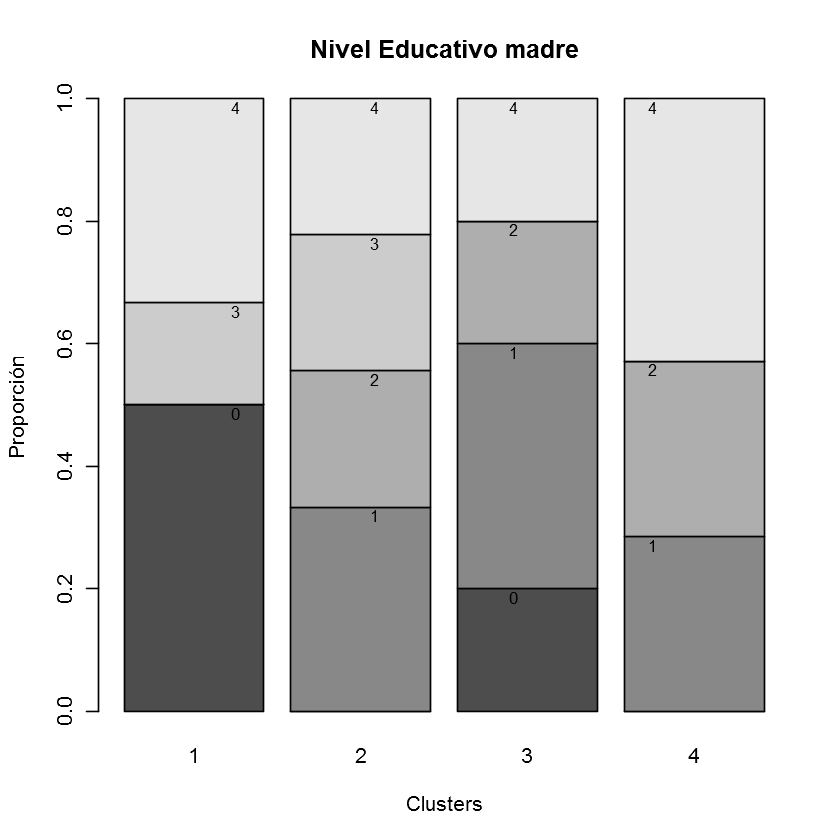

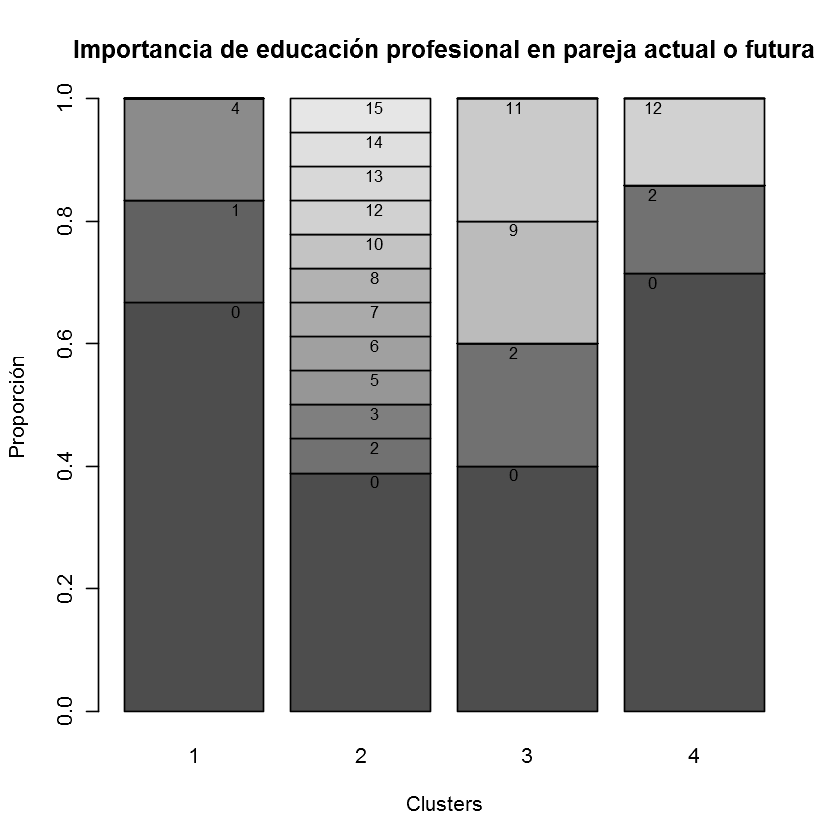

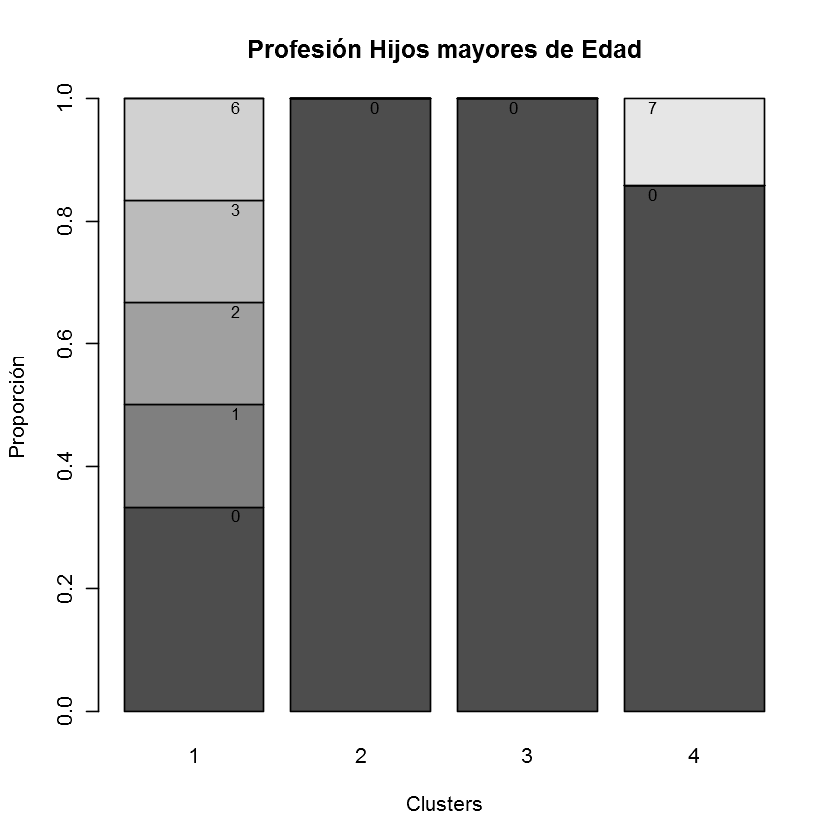

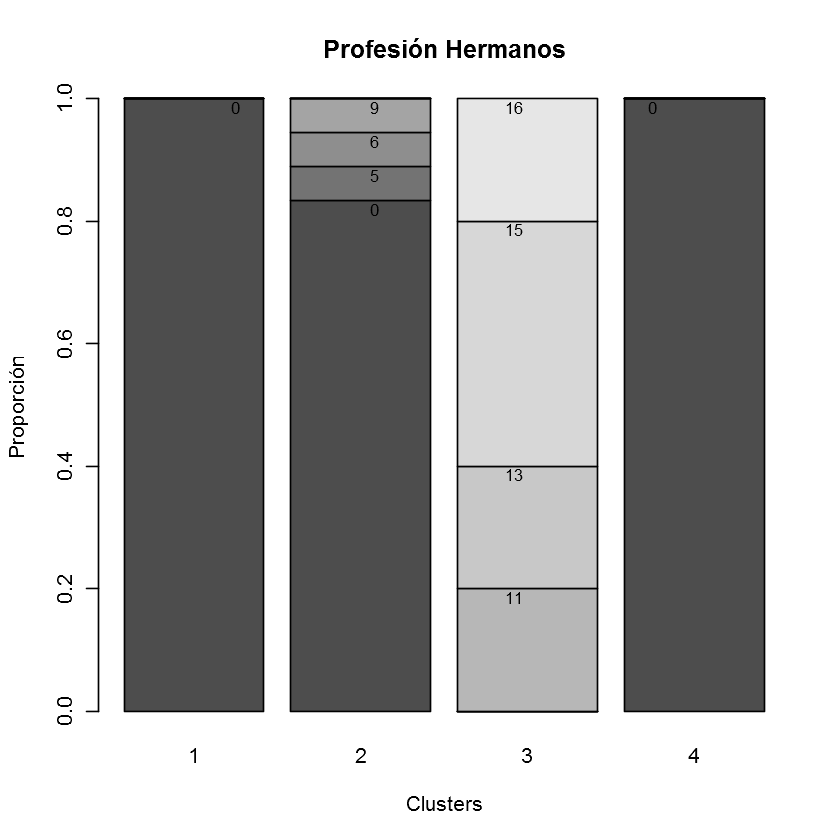

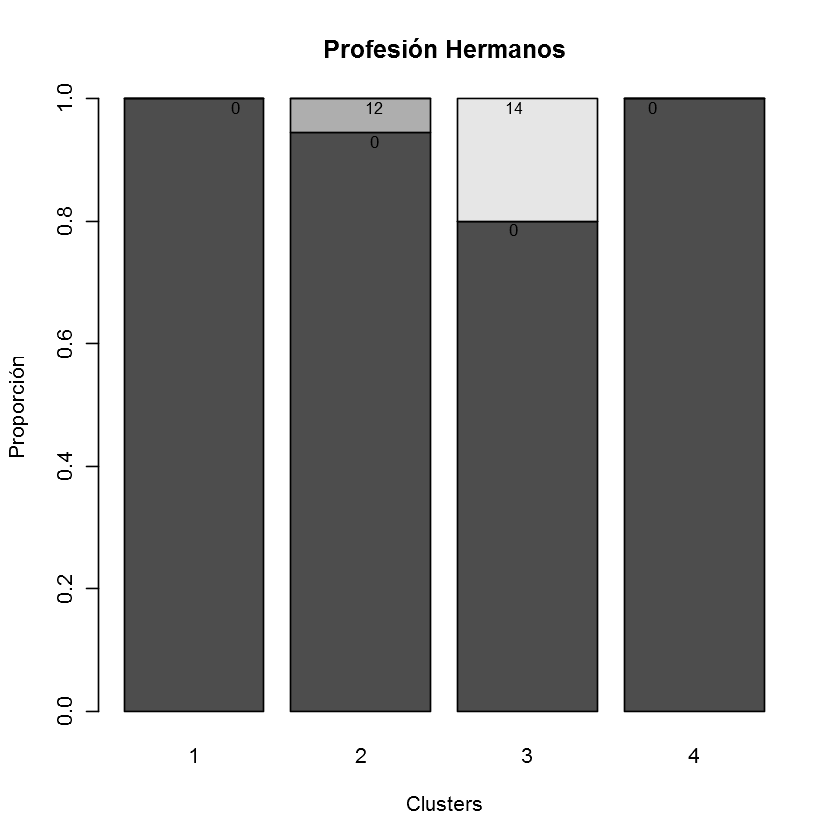

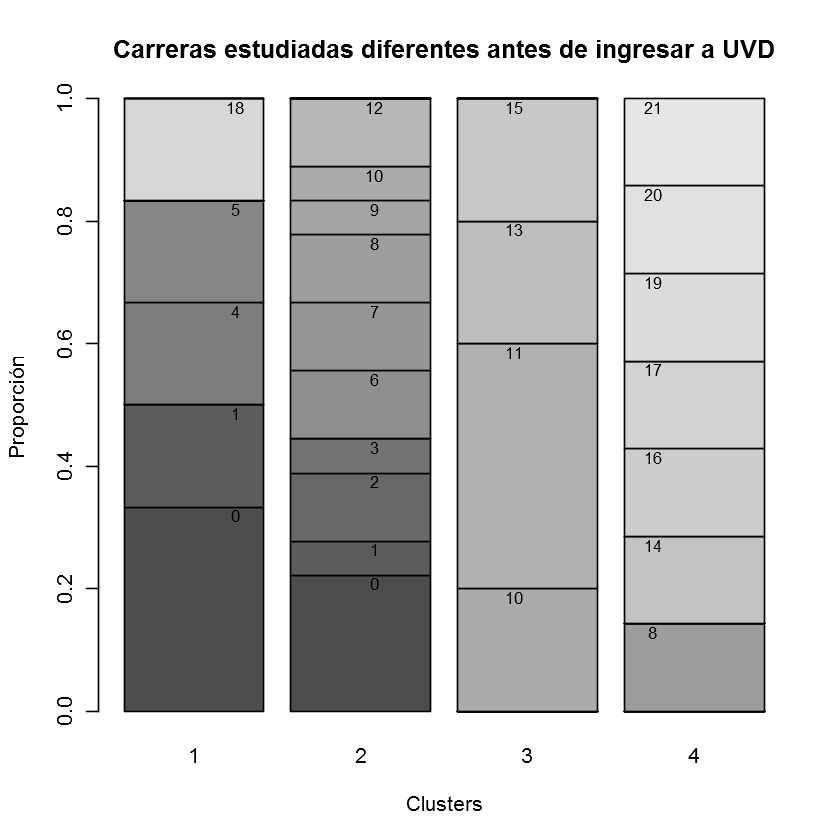

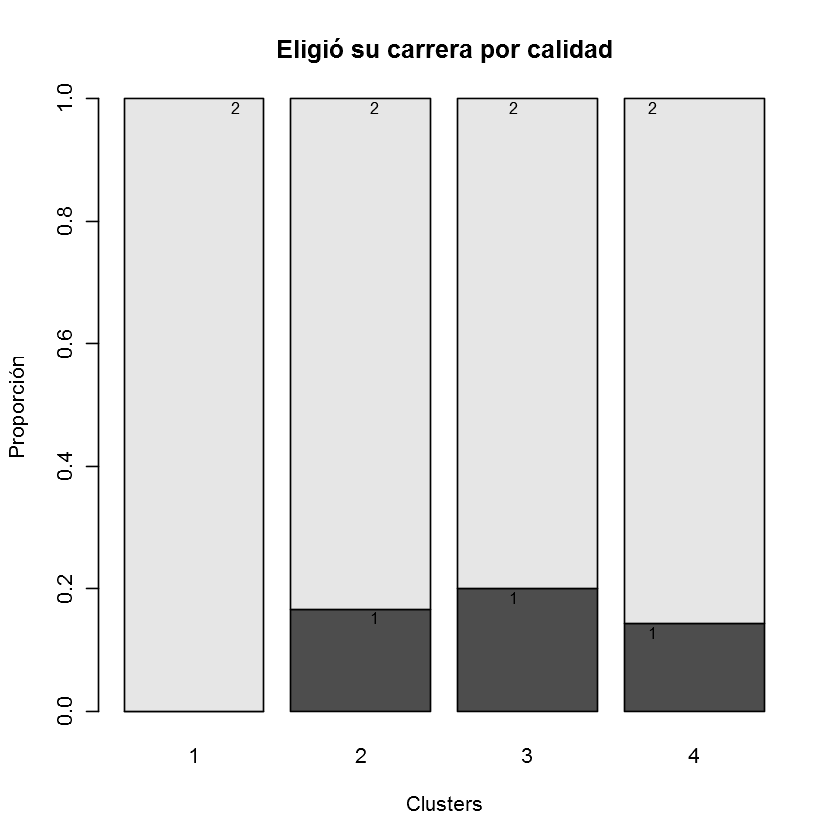

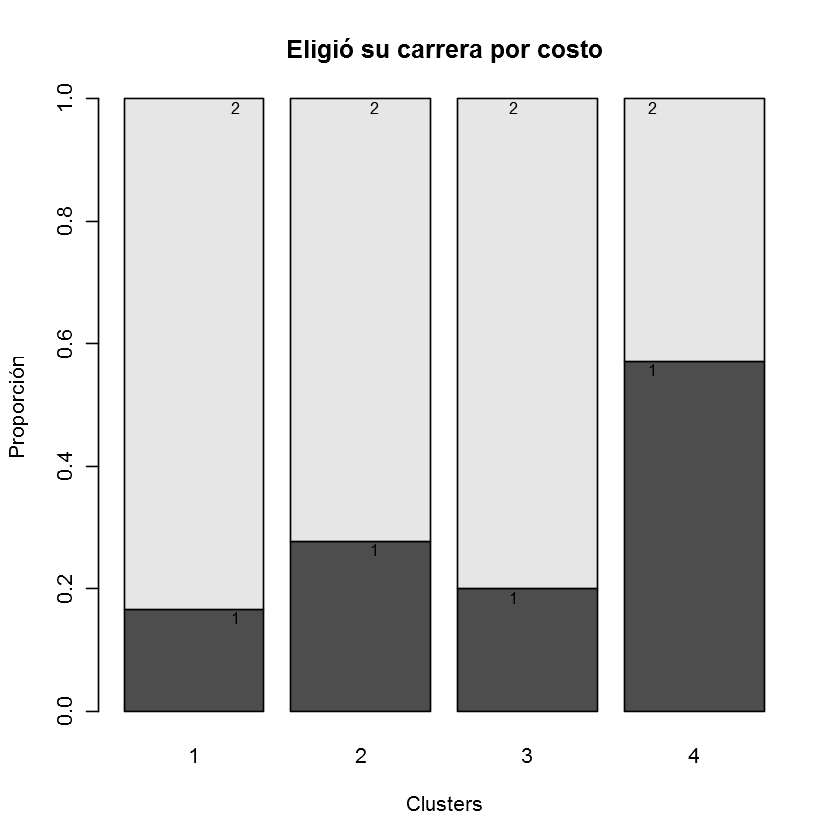

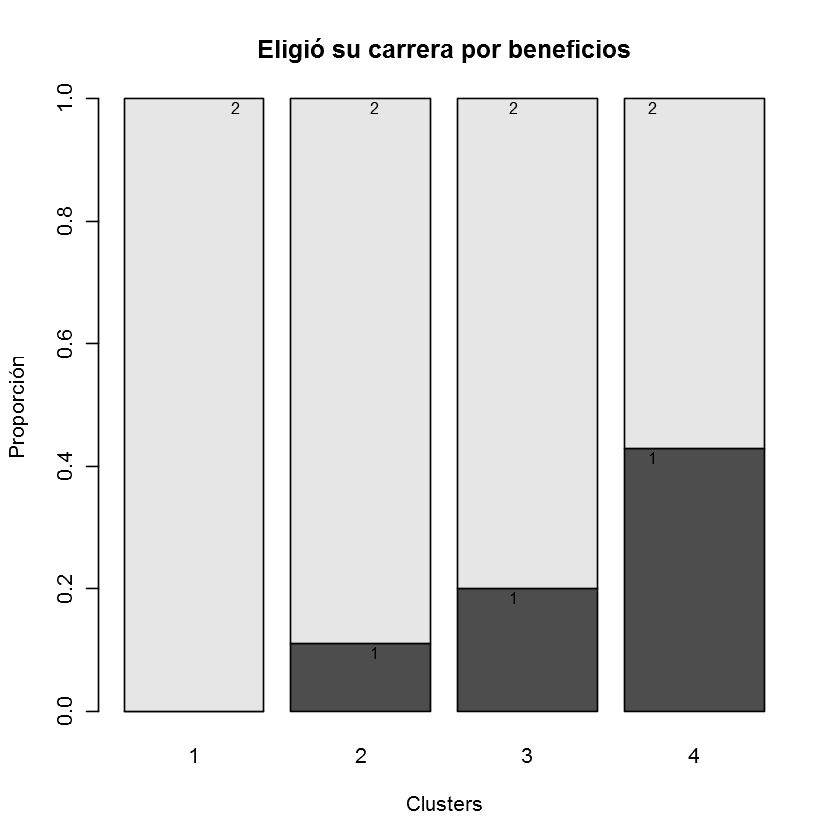

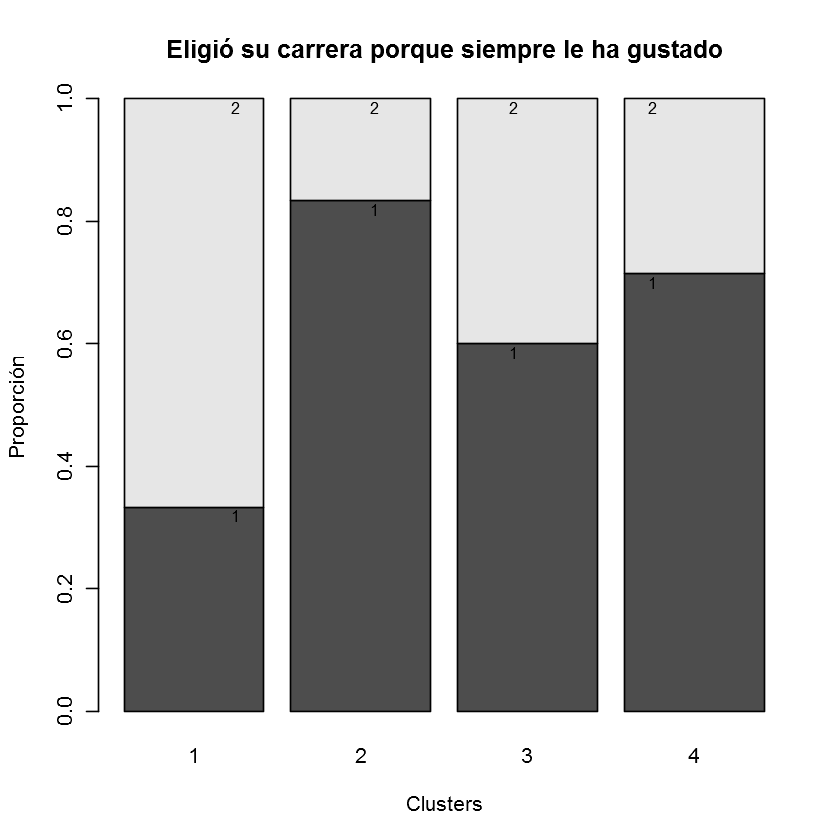

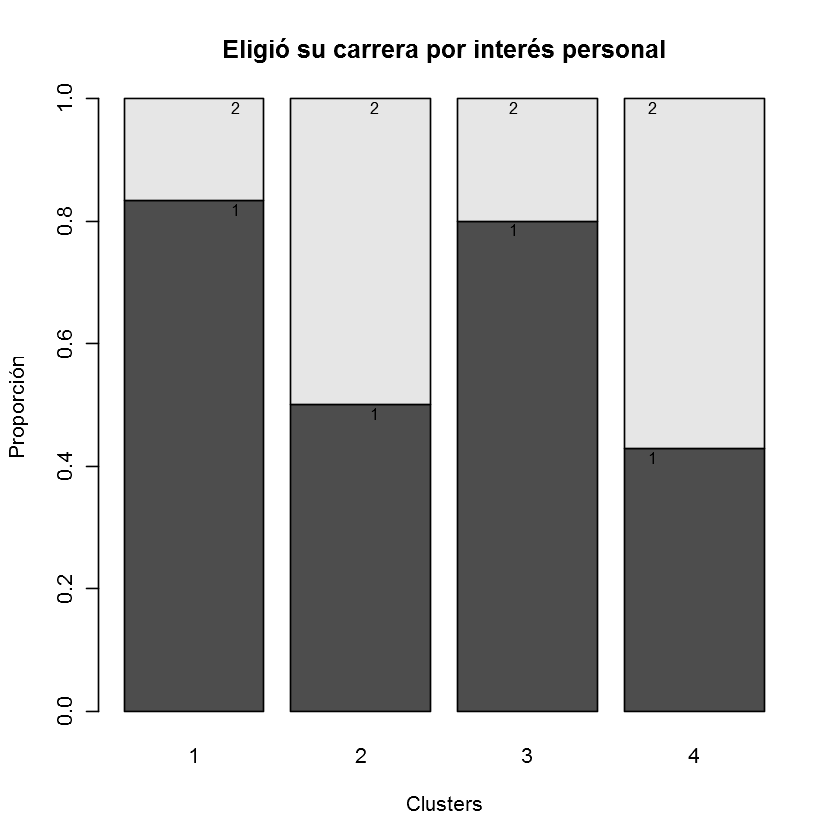

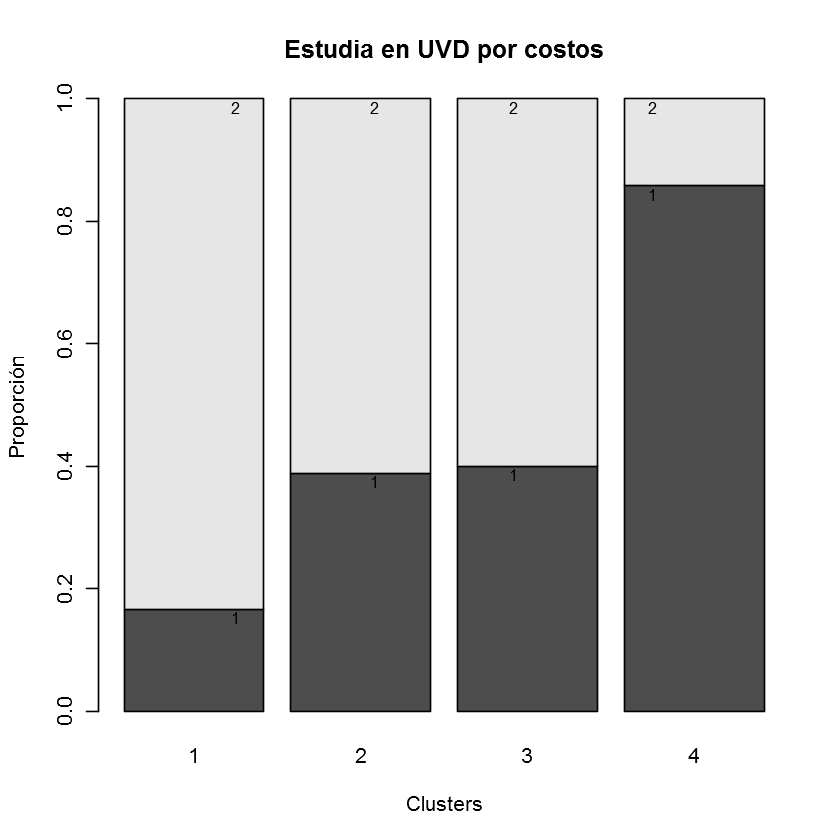

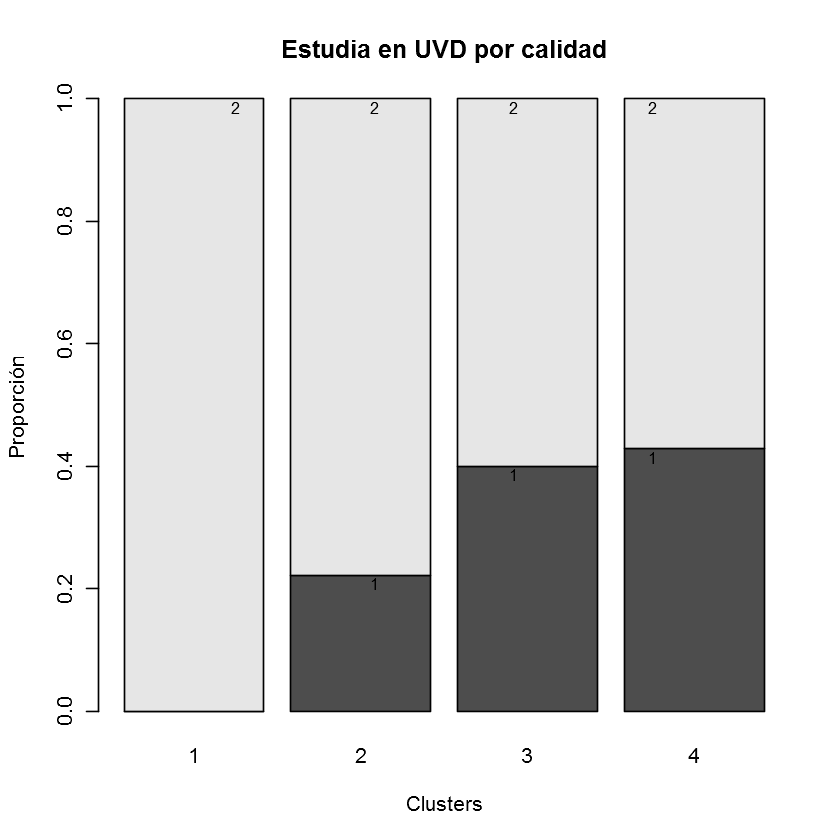

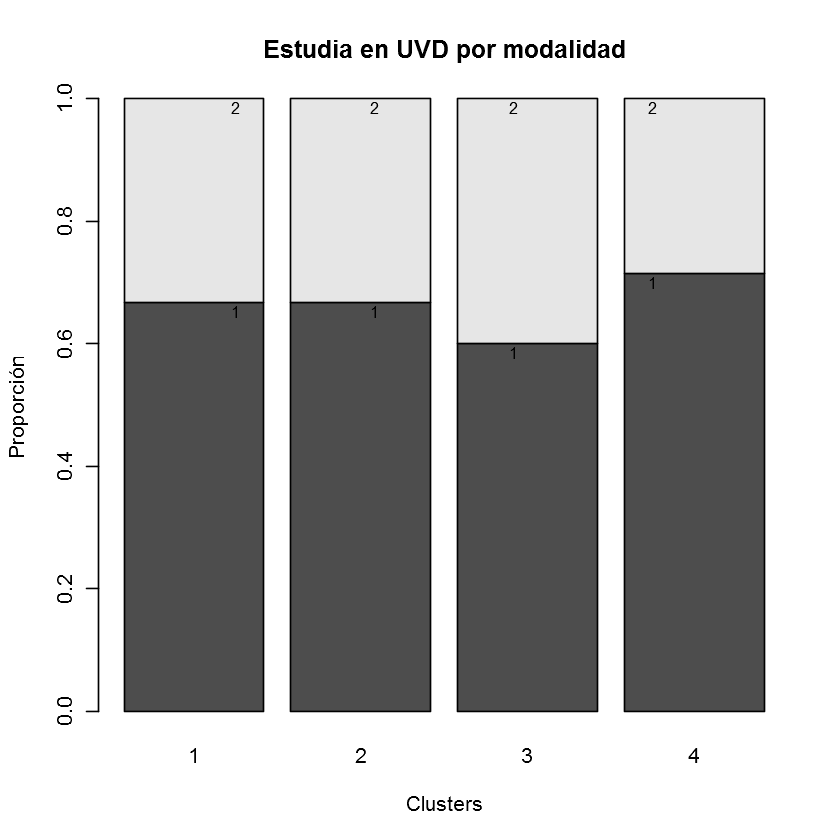

In [9]:
for (i in 1:ncol(test2)){
    data=test2[,i]
    data_table=prop.table(table(test2[,i],groups),2)
    #bp=barplot(data_table,main=varnames[i],xlab="Clusters",ylab="Proporción")
    bp=barplot(data_table,main=varnames[i],xlab="Clusters",ylab="Proporción")
    for (clust in 1:4){
        yval=0
        for (dat in 1:nrow(data_table)){
            if (data_table[dat,clust]>0){
                yval=yval+data_table[dat,clust]
                #print(c(clust,yval))
                text(clust,yval-0.015,rownames(data_table)[dat], cex=0.8)
            }
        }
    }
}
#summary(test1)

In [10]:
data_pca=test1
for (i in 1:ncol(test1)){
    vectr=test1[,i]
    #mode_vect=getmode(vectr[!is.na(vectr)])[1]
    mean_vect=mean(vectr[!is.na(vectr)])
    vectr[is.na(vectr)]=mean_vect#mode_vect
    data_pca[,i]=vectr
}
data_pca

,edad,sexo,poblacin_esp,lug_trabajo,ing_mensual,grupo_fliar,profesin_padre,educacin_padre,profesin_madre,educacin_madre,...,profesin_hnos3,otra_carrera,mot_calidad,mot_costo,mot_beneficio,mot_gusto,mot_personal,costos,calidad,modalidad
1,49,1,0,1,1,6,0,1,0,0,...,0,0,2,2,2,1,2,1,2,1
2,40,1,1,3.875,1,3,0,1,0,0,...,0,1,2,2,2,2,1,2,2,2
3,21,1,0,2,1,5,0,1,0,1,...,0,2,2,1,2,1,1,1,1,1
4,25,1,0.515151515151515,3.875,2,1,1,2,1,2,...,0,0,1,2,2,1,1,2,2,1
5,62,1,6,3,2,6,0,0,0,0,...,0,0,2,2,2,1,1,2,2,2
6,31,1,0,0,1,6,2,3,0,3,...,0,3,1,1,1,1,1,1,1,1
7,40,1,0,0,0,6,0,0,0,4,...,0,4,2,2,2,2,1,2,2,1
8,42,1,0,4,2,2,0,0,0,4,...,0,5,2,2,2,2,1,2,2,1
9,23,1,0,4,1,6,3,2,0,3,...,0,6,1,1,2,1,1,1,1,1
10,26,1,0,0,0,8,0,4,0,4,...,0,7,2,2,2,2,1,2,2,2


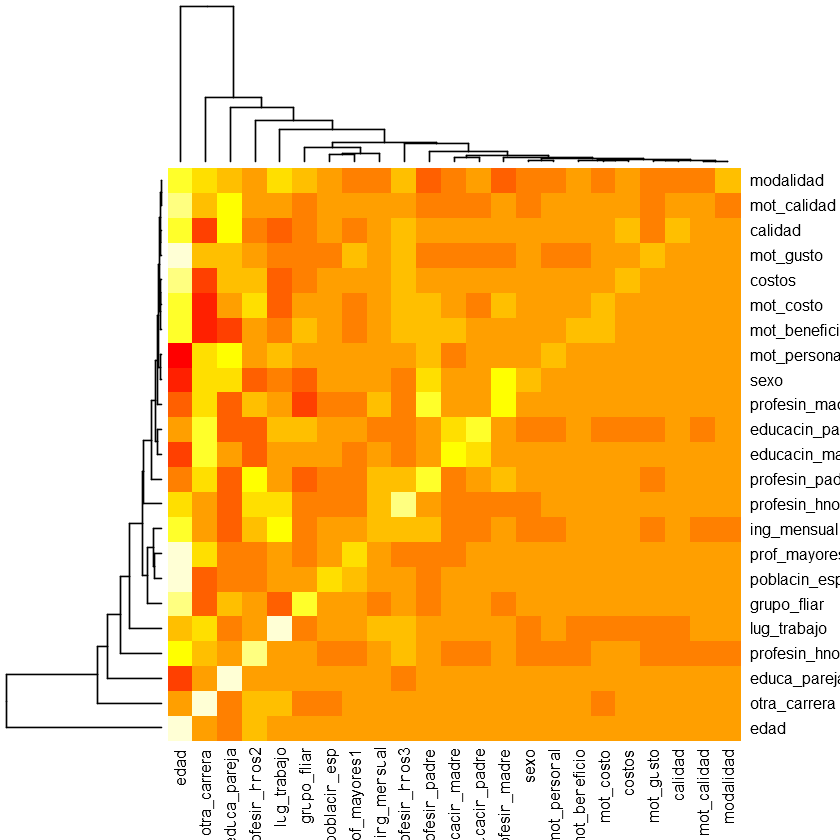

In [11]:
heatmap(cov(data_pca))

In [12]:
km_test3=kmeans(x = data_pca,centers=4,iter.max=25,nstart=100)
print (names(km_test3))
km_test3

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


K-means clustering with 4 clusters of sizes 5, 18, 7, 6

Cluster means:
      edad     sexo poblacin_esp lug_trabajo ing_mensual grupo_fliar
1 43.00000 1.000000    0.3030303    4.400000    2.000000    4.200000
2 25.10952 1.058730    0.4175084    3.034722    1.000000    3.222222
3 33.42857 1.142857    0.2857143    7.285714    1.571429    3.142857
4 47.66667 1.000000    1.2525253    1.979167    1.166667    4.333333
  profesin_padre educacin_padre profesin_madre educacin_madre educa_pareja
1      2.6000000       1.800000      0.8000000       1.600000    4.4000000
2      0.8968254       1.763492      0.3888889       2.166667    4.4444444
3      1.7142857       2.142857      1.0000000       3.000000    4.1428571
4      0.0000000       1.166667      0.0000000       1.833333    0.8333333
  prof_mayores1 profesin_hnos2 profesin_hnos3 otra_carrera mot_calidad
1             0      14.000000      2.8000000    12.000000    1.800000
2             0       1.111111      0.6666667     5.611111    1.77

## Principal Component Analysis

https://www.r-bloggers.com/computing-and-visualizing-pca-in-r/

Handbook of data analysis R
https://cran.r-project.org/web/packages/HSAUR/vignettes/Ch_principal_components_analysis.pdf

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 0.6616014

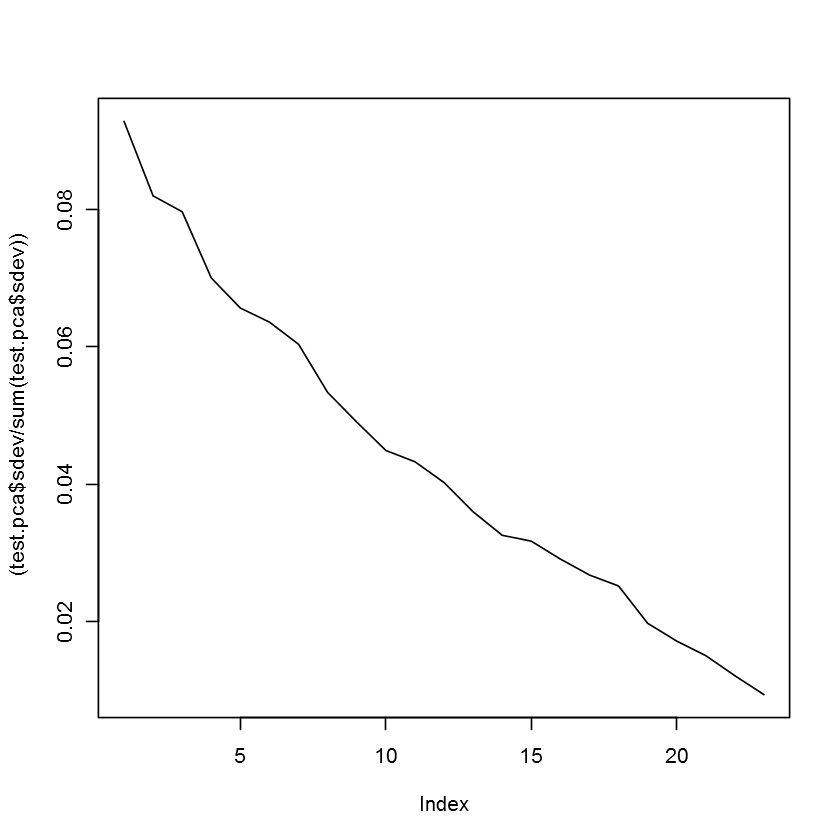

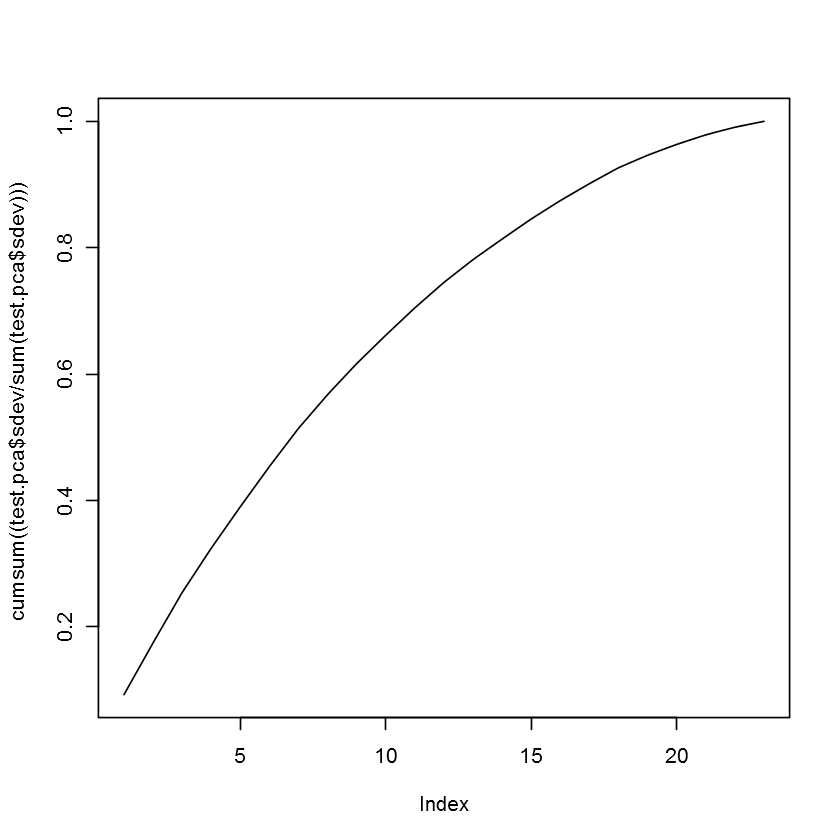

In [13]:
test.pca <- prcomp(data_pca, center = TRUE, scale. = TRUE) 
names(test.pca)
#print((test.pca$sdev/sum(test.pca$sdev)),type="l")
plot((test.pca$sdev/sum(test.pca$sdev)),type="l")
sum((test.pca$sdev/sum(test.pca$sdev))[1:10])
plot(cumsum((test.pca$sdev/sum(test.pca$sdev))),type="l")

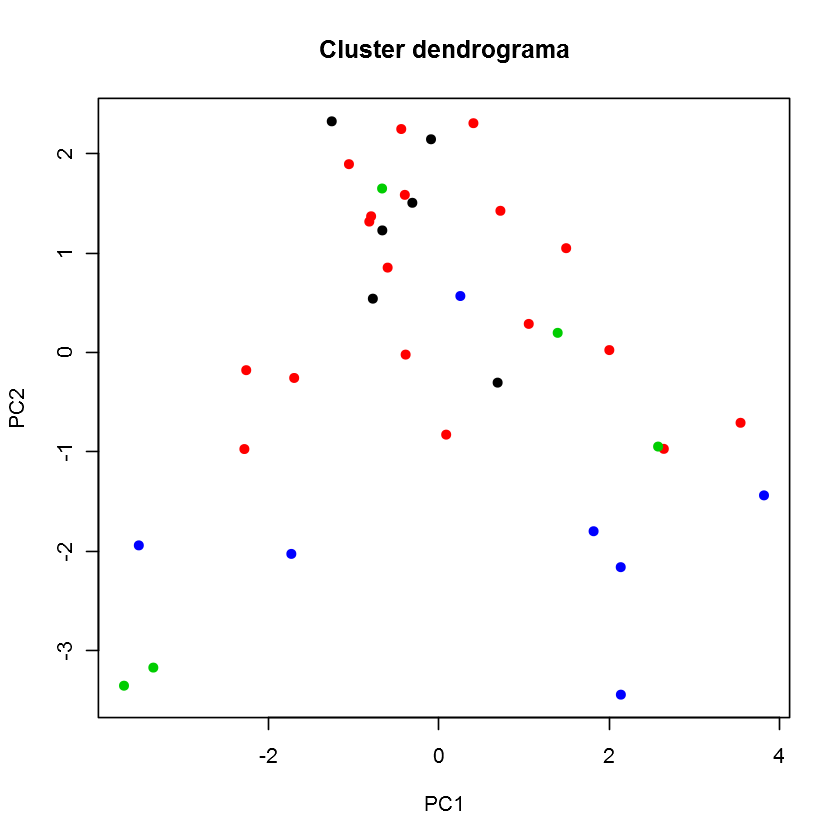

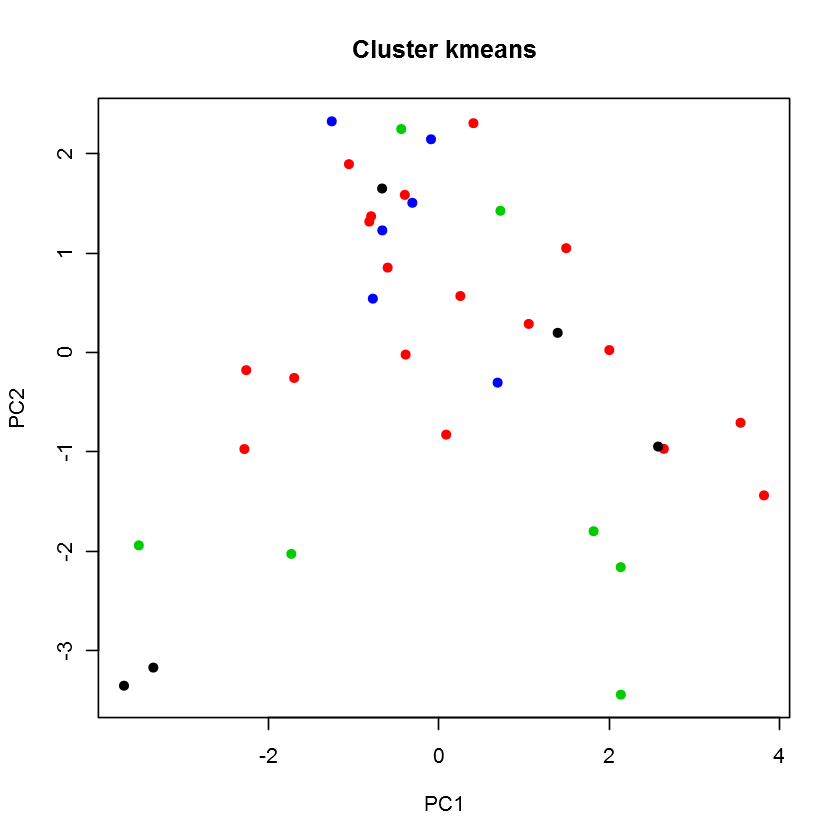

In [14]:
plot(test.pca$x, col=groups,pch=16, main="Cluster dendrograma")
plot(test.pca$x, col=km_test3$cluster,pch=16, main="Cluster kmeans")


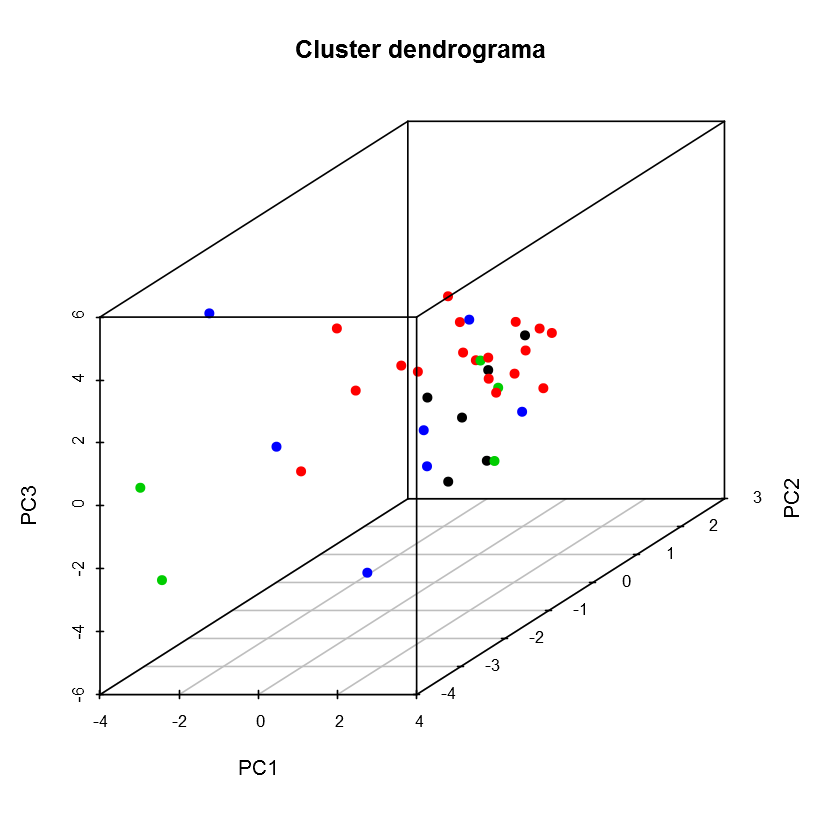

In [15]:
#scatterplot3d(test.pca$rotation[,1:3], col=groups ,pch=16, main="Cluster dendrograma")
scatterplot3d(test.pca$x[,1:3], pch=16,color=groups, main="Cluster dendrograma")

In [16]:
names(test.pca)
test.pca$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
1,-0.310132026549259,1.50686481731175,-0.578584190671366,0.545791060179761,0.543912421468519,1.05109809964564,1.8607880840596,1.1386759645139,0.880664319559307,0.366680401755926,...,0.410813730594658,-0.153651785940993,0.425428427794721,0.247983633182752,0.898831470386648,0.0868166584989788,-0.805722062579236,0.454742414435377,0.070024719925548,0.0362761948869195
2,-0.662859153242036,1.2288044219329,-1.84121852808961,1.39652546124738,-0.779224765188587,0.826584522374487,-0.0324457980121059,-1.12683080843011,-0.817769040438388,0.823905061657145,...,-0.282040003648194,-0.639512994697075,-0.429205546967696,0.491186209097951,0.571691400264072,-0.281883277040077,0.12088063891121,0.428443612166096,0.0863466054614676,0.124089481917269
3,2.00348707902225,0.0237050239789222,0.625855525743923,-0.10041613700915,0.476017320684021,1.59519352895287,1.02498171936681,-0.326163994293857,0.48143952926222,0.470949429734003,...,-1.23433898305355,0.150506554563471,-0.866909512580077,-0.422381354760743,-0.813499817828015,-0.273039362944575,-0.205635057659636,-0.0511909276563471,0.442957366671329,-0.171289420038062
4,-0.38888051804733,-0.0217562214738248,0.729737987592825,-1.06569311884388,-0.51421978743105,1.90543960171455,0.13834911256371,-1.75606234531512,0.0703447603360645,-0.956271839138774,...,0.76602794075178,0.967306754329985,-0.290156882680763,0.701318663200594,0.874541652126598,0.211213292859175,0.41368477683952,0.0239826411274734,-0.0773027446492552,-0.142986343454763
5,-1.25672983572053,2.32718525802489,-4.18998072437187,0.176940970968967,-1.44811345345646,1.71909769304545,1.85632434000497,0.59510896839401,-2.17786962779555,-0.734860572712141,...,-0.827575986767776,0.215002139954527,1.11418727841353,-0.0318149368269837,-0.273022821674149,0.317372016906928,0.274135676471882,-0.137566436825655,0.0527120099899092,0.150985321632742
6,3.54462278878859,-0.708449754691445,0.813747462783882,-0.892018922154298,-0.0893432681025392,1.71166193247279,-0.551623370780275,0.342139711804615,0.0627209438309744,-1.32063201059321,...,0.772754650434941,-0.0913896822933881,0.767535364442679,0.119630746349731,-0.653485930892126,0.462788926278856,-0.296834488433852,0.355508793326347,0.390630935138463,0.221602936856994
7,-0.0907808651303686,2.14645198564086,-0.0431571235780356,0.660614764789228,-0.717085679952219,0.506739389367061,-1.41329291577634,-0.448082506302512,1.34567098086045,0.670823278662281,...,0.543897027930084,0.0344273848239177,0.858251273093269,-0.233068750940039,-0.427114759041225,-0.362842569663264,0.335644634063224,0.207355285074594,-0.45447011745143,0.0962990596314544
8,-0.773993111067906,0.541472037577787,-0.594684477974218,0.50484892623753,-0.937873127015885,0.452984717709736,-0.731277864648468,-1.45917751480662,1.46577622816782,0.517989952030182,...,0.797998864038764,0.0695310969356182,0.655598854411255,-0.143095599708811,-0.0716683226199201,-0.359095506914466,-0.238568111812081,0.208164487386021,0.0678457610450406,-0.197092064369605
9,2.64352744065491,-0.970908310654882,0.905659688242448,-1.86614710865769,0.168006296561989,1.89762123088169,-0.0613445945950658,-0.160942426341439,0.023364118057799,0.156766954874414,...,0.436943581660485,0.562264490634981,0.203716130588539,-0.658398933396125,-0.287092180508061,-0.60051935288342,0.754482790346646,-0.104606782388843,-0.0709686790493601,-0.213268857657896
10,0.407218943832059,2.30839427866496,-0.111687613343314,-0.920586096705374,-0.534745061708105,-0.924334987602518,-2.4137545653887,-0.483238011901306,-0.0250197123844883,0.813561197672955,...,0.149928359853888,-1.20014245690222,-0.391995564568145,0.730508404184446,-0.49430316208545,-0.342484570867544,0.485611045990185,-0.244912350511003,0.126152686502401,0.279778353904001


In [17]:
modas=matrix(ncol = 4,nrow = length(colnames(data_pca)))
colnames(modas)=c("Clust_1","Clust_2","Clust_3","Clust_4")
rownames(modas)=colnames(data_pca)
medias=modas

for(i in 1:max(groups)){
    print(paste("*************","Cluster",i,"*************"))
    for (j in 1:ncol(data_pca)){
        #barplot(table(data_pca[groups==i,j]),main=colnames(data_pca)[j])
        modas[j,i]=getmode(data_pca[groups==i,j])
        medias[j,i]=mean(data_pca[groups==i,j])
    }
    print(summary(data_pca[groups==i,]))
    print(paste("*************","Cluster",i,"*************"))
}

[1] "************* Cluster 1 *************"
      edad            sexo    poblacin_esp     lug_trabajo     ing_mensual   
 Min.   :40.00   Min.   :1   Min.   :0.0000   Min.   :0.000   Min.   :0.000  
 1st Qu.:40.50   1st Qu.:1   1st Qu.:0.0000   1st Qu.:0.250   1st Qu.:1.000  
 Median :45.50   Median :1   Median :0.2576   Median :2.000   Median :1.000  
 Mean   :47.67   Mean   :1   Mean   :1.2525   Mean   :1.979   Mean   :1.167  
 3rd Qu.:52.00   3rd Qu.:1   3rd Qu.:0.8788   3rd Qu.:3.656   3rd Qu.:1.750  
 Max.   :62.00   Max.   :1   Max.   :6.0000   Max.   :4.000   Max.   :2.000  
  grupo_fliar    profesin_padre educacin_padre  profesin_madre educacin_madre 
 Min.   :2.000   Min.   :0      Min.   :0.000   Min.   :0      Min.   :0.000  
 1st Qu.:3.000   1st Qu.:0      1st Qu.:0.000   1st Qu.:0      1st Qu.:0.000  
 Median :4.500   Median :0      Median :0.500   Median :0      Median :1.500  
 Mean   :4.333   Mean   :0      Mean   :1.167   Mean   :0      Mean   :1.833  
 3rd Qu.:6.000 

                  Clust_1    Clust_2    Clust_3    Clust_4
edad           47.6666667 27.1650794 43.0000000 28.1428571
sexo            1.0000000  1.0587302  1.0000000  1.1428571
poblacin_esp    1.2525253  0.4730640  0.3030303  0.1428571
lug_trabajo     1.9791667  3.0347222  4.4000000  7.2857143
ing_mensual     1.1666667  1.0555556  2.0000000  1.4285714
grupo_fliar     4.3333333  3.8333333  4.2000000  1.5714286
profesin_padre  0.0000000  0.8968254  2.6000000  1.7142857
educacin_padre  1.1666667  1.9857143  1.8000000  1.5714286
profesin_madre  0.0000000  0.3888889  0.8000000  1.0000000
educacin_madre  1.8333333  2.3333333  1.6000000  2.5714286
educa_pareja    0.8333333  5.2777778  4.4000000  2.0000000
prof_mayores1   2.0000000  0.0000000  0.0000000  1.0000000
profesin_hnos2  0.0000000  1.1111111 14.0000000  0.0000000
profesin_hnos3  0.0000000  0.6666667  2.8000000  0.0000000
otra_carrera    4.6666667  5.1666667 12.0000000 16.4285714
mot_calidad     2.0000000  1.8333333  1.8000000  1.85714

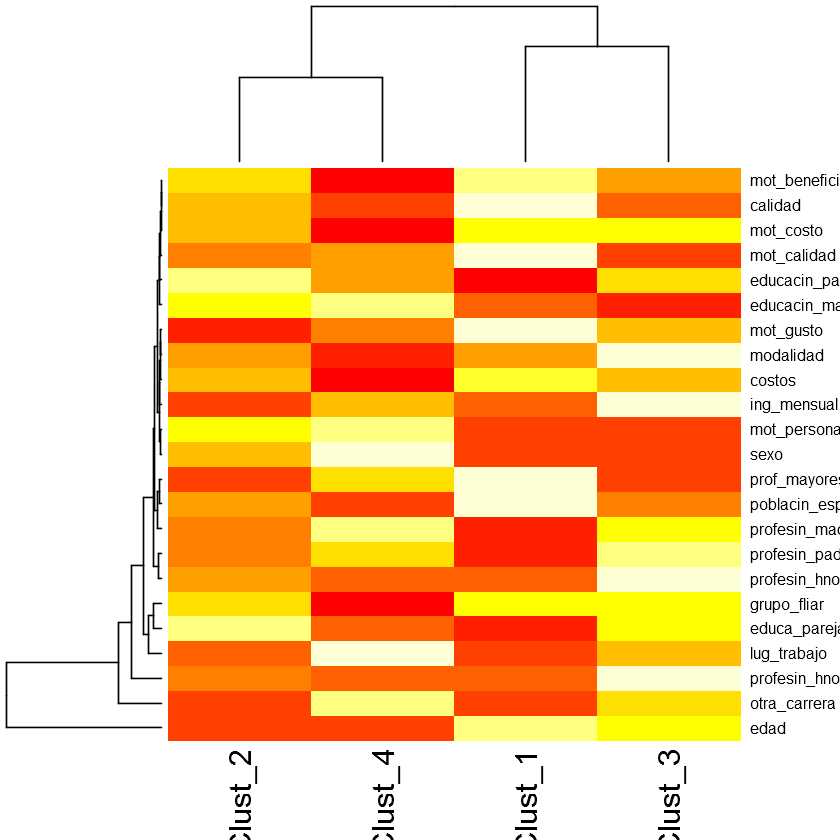

In [18]:
print(medias)
print(dist(t(medias)))
heatmap(medias)

               Clust_1 Clust_2 Clust_3 Clust_4
edad                40      21      44      18
sexo                 1       1       1       1
poblacin_esp         0       0       0       0
lug_trabajo          0       0       0       0
ing_mensual          1       1       0       0
grupo_fliar          6       1       6       1
profesin_padre       0       0       0       0
educacin_padre       0       1       2       1
profesin_madre       0       0       0       0
educacin_madre       0       1       1       4
educa_pareja         0       0       0       0
prof_mayores1        0       0       0       0
profesin_hnos2       0       0      15       0
profesin_hnos3       0       0       0       0
otra_carrera         0       0      11      14
mot_calidad          2       2       2       2
mot_costo            2       2       2       1
mot_beneficio        2       2       2       2
mot_gusto            2       1       1       1
mot_personal         1       1       1       2
costos       

         Clust_1  Clust_2  Clust_3
Clust_2 19.72308                  
Clust_3 19.20937 30.03331         
Clust_4 26.96294 14.76482 30.78961

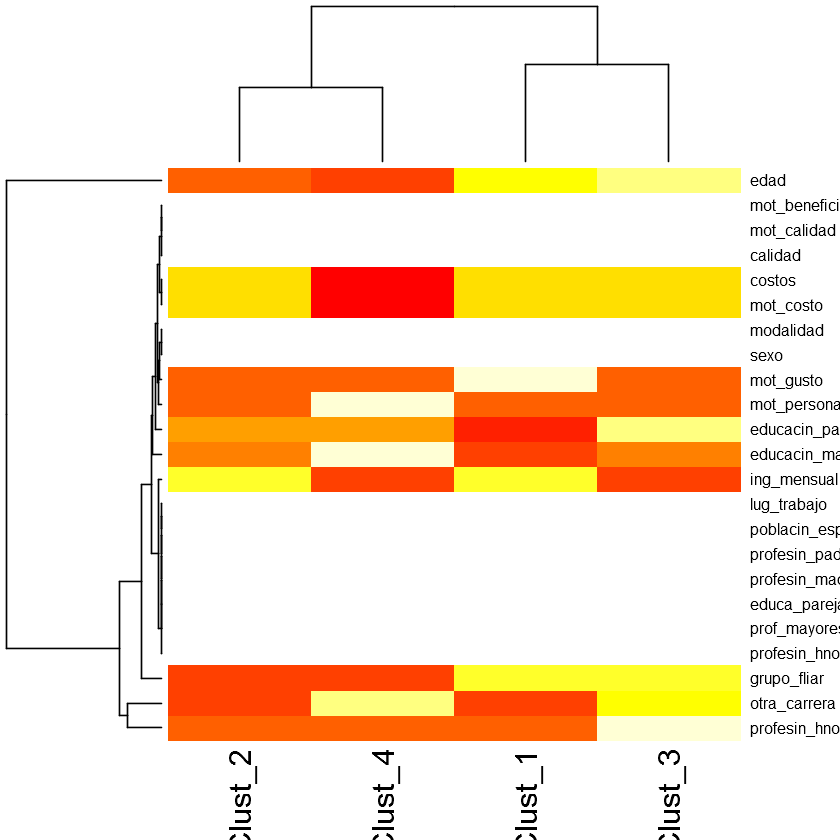

In [19]:
print(modas)
dist(t(modas))
heatmap(modas)